<a href="https://colab.research.google.com/github/PawelSmolinski/Psychometria/blob/main/Odpowiedzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Przydatne komendy:
ctrl + F9 - uruchom wszytsko
ctrl + /  - komentuj zaznaczone linijki kodu

In [ ]:
# Instalacja pakietów (2-3 minuty)
install.packages("dplyr")
install.packages("psych")
install.packages("lavaan")
install.packages("corrplot")
install.packages("GPArotation")
install.packages("semTools")


library('dplyr')
library('psych')
library('lavaan')
library('corrplot')
library('GPArotation')
library('semTools')

In [ ]:
install.packages("readxl")
library(readxl)

In [31]:
# Wczytanie danych
dane <- read_excel("/content/dane.xlsx")

In [47]:
# Struktura danych
str(dane)

tibble [230 × 32] (S3: tbl_df/tbl/data.frame)
 $ Sygnatura czasowa: POSIXct[1:230], format: "2022-12-17 15:49:56" "2022-12-17 16:20:36" ...
 $ Płeć             : chr [1:230] "Kobieta" "Kobieta" "Kobieta" "Mężczyzna" ...
 $ Wiek             : num [1:230] 23 51 51 45 49 33 32 49 37 22 ...
 $ P1               : num [1:230] 4 5 3 4 4 4 3 3 4 5 ...
 $ P2               : num [1:230] 4 5 4 3 3 3 3 3 5 5 ...
 $ P3               : num [1:230] 3 5 5 1 3 4 4 4 2 5 ...
 $ P4               : num [1:230] 3 5 3 1 3 4 3 4 4 5 ...
 $ P5               : num [1:230] 5 5 3 3 4 5 3 3 3 5 ...
 $ P6               : num [1:230] 4 5 5 1 4 5 4 4 3 5 ...
 $ P7               : num [1:230] 5 5 3 2 4 4 4 3 3 5 ...
 $ P8               : num [1:230] 5 5 3 2 3 3 5 3 4 5 ...
 $ P9               : num [1:230] 4 5 4 2 3 4 4 3 3 5 ...
 $ P10              : num [1:230] 4 5 4 3 4 3 4 3 4 5 ...
 $ P11              : num [1:230] 4 5 4 3 4 5 4 3 5 5 ...
 $ P12              : num [1:230] 4 5 4 3 3 5 4 3 4 5 ...
 $ P13          

In [33]:
# Zmienianie nazwy
names1 <- paste0("P", 1:14)
names2 <- paste0("Q", 1:13)

# Rename the columns
names(dane)[4:17] <- names1
names(dane)[18:30] <- names2

In [34]:
# Usuwanie brakujących wartości
dane <- na.omit(dane)

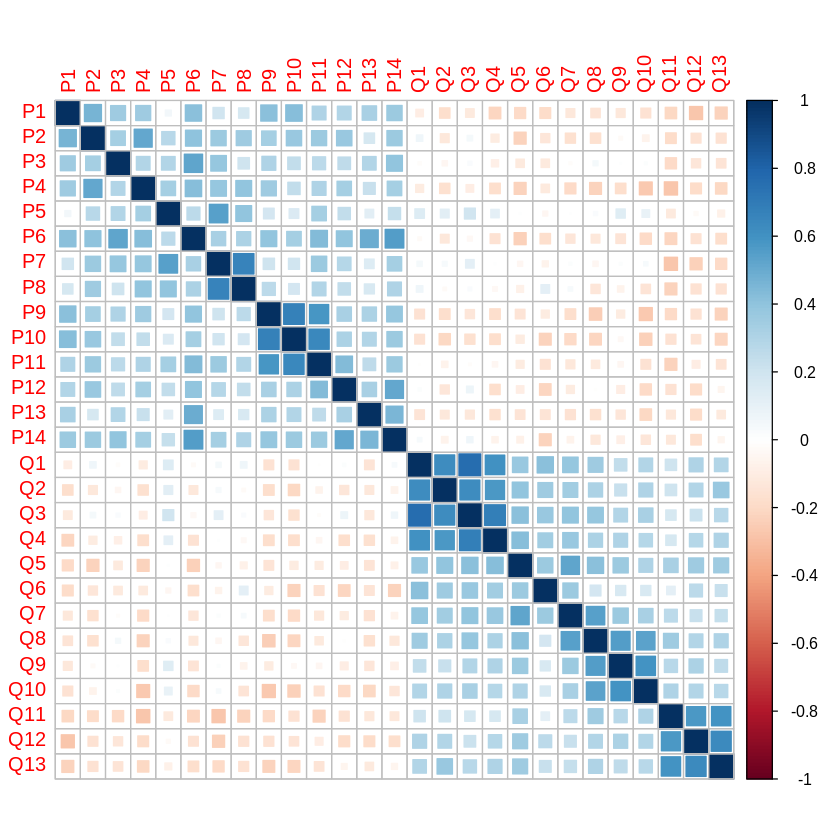

In [57]:
# Wizualizacja macierzy
macierz <- cor(dane[,4:30])

corrplot(macierz, method = 'square')

In [36]:
dane <- dane %>%
  mutate(across(c(P4), ~recode(.,`1` = 5, `2` = 4, `3` = 3, `4` = 2, `5` = 1)))

In [ ]:
# Statystyki opisowe
describe(dane[,4:30])

In [39]:
# Obliczanie wyniku
dane$P <- rowMeans(dane[,4:17])
dane$Q <- rowMeans(dane[,18:30])

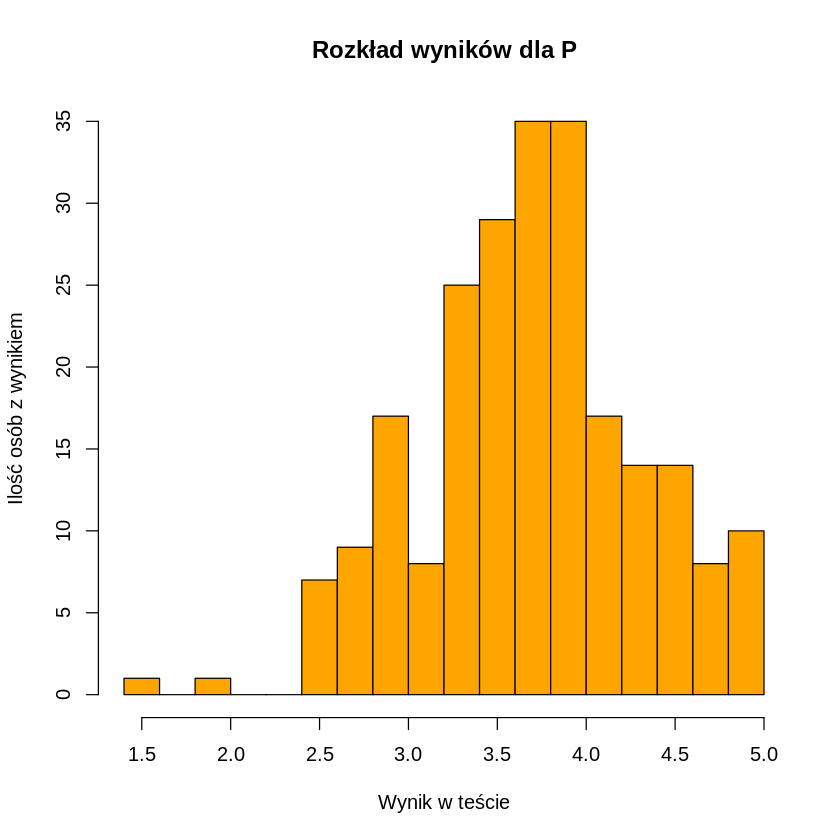

In [58]:
# Prosty wykres rozkładu
hist(dane$P, # Nazwa zmiennej
     breaks = 15, # Liczba przedziałów
     col = "orange", # Kolor wypełnienia
     border = "black", # Kolor obramowania
     main = "Rozkład wyników dla P", # Tytuł wykresu
     xlab = "Wynik w teście", # Etykieta osi X
     ylab = "Ilość osób z wynikiem") # Etykieta osi Y

In [46]:
# Eksploracyjna analiza czynnikowa
efa <- fa(dane[,4:17], nfactors =  1)
print(summary(efa))
efa$loadings


Factor analysis with Call: fa(r = dane[, 4:17], nfactors = 1)

Test of the hypothesis that 1 factor is sufficient.
The degrees of freedom for the model is 77  and the objective function was  1.94 
The number of observations was  230  with Chi Square =  432.82  with prob <  5.5e-51 

The root mean square of the residuals (RMSA) is  0.1 
The df corrected root mean square of the residuals is  0.11 

Tucker Lewis Index of factoring reliability =  0.651
RMSEA index =  0.142  and the 10 % confidence intervals are  0.129 0.155
BIC =  14.09NULL



Loadings:
    MR1  
P1  0.556
P2  0.621
P3  0.549
P4  0.591
P5  0.441
P6  0.709
P7  0.562
P8  0.511
P9  0.639
P10 0.602
P11 0.664
P12 0.575
P13 0.477
P14 0.662

                 MR1
SS loadings    4.826
Proportion Var 0.345

In [50]:
# Model strukturalny
model <- 'PP =~ P1 + P2 + P3 + P4 + P5 + P6 + P7 + P8 + P9 + P10 + P11 + P12 + P13 + P14
          QQ =~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 + Q12 + Q13'


In [ ]:
# Konfirmacyjna analiza czynnikowa
cfa <- cfa(model, dane)

In [60]:
# Miary dopasowania
fit_measures <- fitMeasures(cfa)
print(fit_measures)

# Ładunki
loadings <- parameterEstimates(cfa)
print(loadings)

                 npar                  fmin                 chisq 
               55.000                 2.730              1256.010 
                   df                pvalue        baseline.chisq 
              323.000                 0.000              3055.967 
          baseline.df       baseline.pvalue                   cfi 
              351.000                 0.000                 0.655 
                  tli                  nnfi                   rfi 
                0.625                 0.625                 0.553 
                  nfi                  pnfi                   ifi 
                0.589                 0.542                 0.659 
                  rni                  logl     unrestricted.logl 
                0.655             -8399.788             -7771.783 
                  aic                   bic                ntotal 
            16909.576             17098.671               230.000 
                 bic2                 rmsea        rmsea.ci.lo

In [61]:
# Rzetelność Omega dla podscal
omegaResults <- semTools::reliability(cfa)
print(omegaResults)

              PP        QQ
alpha  0.8741943 0.8773753
omega  0.8749313 0.8767310
omega2 0.8749313 0.8767310
omega3 0.8729708 0.8553932
avevar 0.3371062 0.3673888


In [62]:
# Test korelacji
cor.test(dane$P, dane$Q)


	Pearson's product-moment correlation

data:  dane$P and dane$Q
t = -4.282, df = 228, p-value = 2.73e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3884744 -0.1487161
sample estimates:
       cor 
-0.2728261 
